In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [4]:
df_MLE = df[df['job_title_short'] == 'Machine Learning Engineer'].copy()

In [5]:
df_MLE['month_no'] = df_MLE['job_posted_date'].dt.month

In [6]:
df_mle_explode = df_MLE.explode('job_skills').copy()
df_mle_explode

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,month_no
23,Machine Learning Engineer,"PhD position in computer science (NLP, finance)",Russia,via hh.ru,Full-time,False,Russia,2023-09-30 13:52:00,False,False,Russia,None,NaN,NaN,Грешнев Олег Владимирович,python,"{'programming': ['python', 'r']}",9
23,Machine Learning Engineer,"PhD position in computer science (NLP, finance)",Russia,via hh.ru,Full-time,False,Russia,2023-09-30 13:52:00,False,False,Russia,None,NaN,NaN,Грешнев Олег Владимирович,r,"{'programming': ['python', 'r']}",9
50,Machine Learning Engineer,Sr ML Engineer - Research & NLP (Remote),"Toronto, ON, Canada",via Careers At BenchSci,Full-time,False,Canada,2023-08-24 13:40:48,False,False,Canada,None,NaN,NaN,BenchSci,python,"{'libraries': ['pytorch', 'pandas'], 'programm...",8
50,Machine Learning Engineer,Sr ML Engineer - Research & NLP (Remote),"Toronto, ON, Canada",via Careers At BenchSci,Full-time,False,Canada,2023-08-24 13:40:48,False,False,Canada,None,NaN,NaN,BenchSci,sql,"{'libraries': ['pytorch', 'pandas'], 'programm...",8
50,Machine Learning Engineer,Sr ML Engineer - Research & NLP (Remote),"Toronto, ON, Canada",via Careers At BenchSci,Full-time,False,Canada,2023-08-24 13:40:48,False,False,Canada,None,NaN,NaN,BenchSci,pytorch,"{'libraries': ['pytorch', 'pandas'], 'programm...",8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785669,Machine Learning Engineer,Senior Machine Learning Engineer,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-06-07 06:18:29,False,False,Poland,None,NaN,NaN,Digital Hub Warsaw At Bayer,azure,"{'cloud': ['aws', 'gcp', 'azure'], 'libraries'...",6
785669,Machine Learning Engineer,Senior Machine Learning Engineer,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-06-07 06:18:29,False,False,Poland,None,NaN,NaN,Digital Hub Warsaw At Bayer,tensorflow,"{'cloud': ['aws', 'gcp', 'azure'], 'libraries'...",6
785669,Machine Learning Engineer,Senior Machine Learning Engineer,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-06-07 06:18:29,False,False,Poland,None,NaN,NaN,Digital Hub Warsaw At Bayer,pytorch,"{'cloud': ['aws', 'gcp', 'azure'], 'libraries'...",6
785669,Machine Learning Engineer,Senior Machine Learning Engineer,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-06-07 06:18:29,False,False,Poland,None,NaN,NaN,Digital Hub Warsaw At Bayer,terraform,"{'cloud': ['aws', 'gcp', 'azure'], 'libraries'...",6


In [9]:
df_mle_pivot = df_mle_explode.pivot_table(index='month_no', columns='job_skills', aggfunc='size', fill_value=0)

In [15]:
df_mle_pivot.loc['Total'] = df_mle_pivot.sum()
df_mle_pivot = df_mle_pivot[df_mle_pivot.loc['Total'].sort_values(ascending=False).index]
df_mle_pivot = df_mle_pivot.drop('Total')
df_mle_pivot

job_skills,python,pytorch,tensorflow,aws,sql,azure,spark,docker,java,kubernetes,...,play framework,clickup,nuix,tidyr,nuxt.js,gatsby,blazor,powerbi,asp.net core,monday.com
month_no,,,,,,,,,,,,,,,,,,,,,
1,975,417,431,394,365,236,319,274,198,237,...,0,0,0,0,0,0,0,0,0,0
2,723,334,318,264,288,176,230,218,172,175,...,1,0,0,0,1,0,0,0,0,0
3,770,349,348,295,288,224,246,205,201,196,...,0,1,0,1,0,0,0,0,0,1
4,675,315,307,253,273,203,213,203,180,179,...,0,0,0,0,0,0,0,0,0,0
5,619,282,284,245,215,178,191,190,177,154,...,0,0,0,0,0,0,0,0,0,0
6,774,363,350,306,285,231,234,212,206,161,...,0,0,0,0,0,0,0,0,0,0
7,790,369,355,328,289,218,220,228,187,202,...,0,0,0,0,0,0,0,0,0,0
8,913,397,390,345,333,274,225,234,232,212,...,0,0,0,0,0,0,1,1,0,0
9,827,369,352,310,271,241,213,231,200,197,...,0,0,1,0,0,0,0,0,0,0


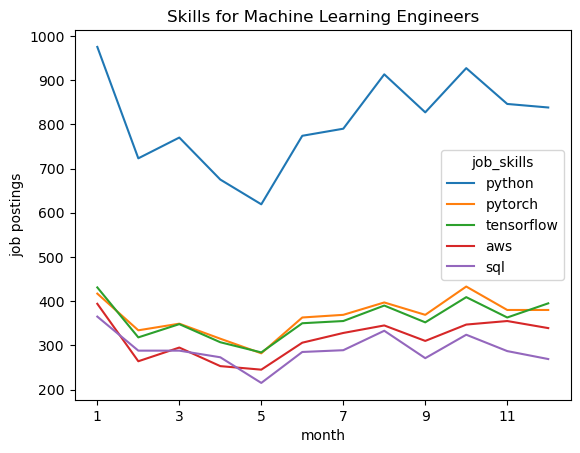

In [18]:
df_mle_pivot.iloc[:, :5].plot(kind='line')
plt.title('Top 5 Skills for Machine Learning Engineers')
plt.xlabel('month')
plt.ylabel('job postings')
plt.show()